In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Mois,Accenteur mouchet,Corneille noire,Fauvette à tête noire,Geai des chênes,Goéland argenté,Grimpereau des jardins,Grive musicienne,Merle noir,Mésange bleue,...,Pigeon biset,Pigeon ramier,Pinson des arbres,Pouillot véloce,Roitelet huppé,Roitelet à triple bandeau,Rougegorge familier,Sittelle torchepot,Troglodyte mignon,Étourneau sansonnet
0,janvier,1,22,0,4,0,3,1,22,16,...,1,37,3,0,4,0,14,0,5,33
1,fevrier,1,9,0,3,0,4,1,13,7,...,1,8,3,1,2,0,6,2,4,7
2,mars,0,25,6,2,1,7,3,24,16,...,17,24,11,3,1,2,9,2,10,16
3,avril,3,7,8,2,0,2,0,12,7,...,3,10,3,2,0,1,1,0,5,35
4,mai,0,7,10,1,0,5,0,24,4,...,8,9,6,4,0,0,11,0,7,48


# Partie 1 - Analyse préliminaire (Statistiques descriptives)

---

In [3]:
print(f"Il y a {data.shape[1]} espèces différentes qui ont été observées dans le parc.")

Il y a 28 espèces différentes qui ont été observées dans le parc.


In [4]:
data_sans_mois = data.drop("Mois",axis=1) #supprime la colonne "Mois" pour pouvoir sommer toutes les valeurs numériques du dataset
print(f"{data_sans_mois.sum().sum()} espèces différentes ont été observées dans le parc.")

1672 espèces différentes ont été observées dans le parc.


In [5]:
espece_plus_observee = data_sans_mois.sum().idxmax() #idxmax retourne l'index du maximum de la série 
nbr_max = max(data_sans_mois.sum())

print(f"L'espèce qui a été la plus observée dans l'année est le {espece_plus_observee}, avec {nbr_max} observations.")

L'espèce qui a été la plus observée dans l'année est le Pigeon ramier, avec 232 observations.


In [6]:
nbr_min = data_sans_mois.sum().min()
espece_moins_observee = data_sans_mois.sum()[data_sans_mois.sum() == nbr_min].index.tolist()

print(f"Les espèces les moins observées dans l'année sont {espece_moins_observee}, avec {nbr_min} observation.")

Les espèces les moins observées dans l'année sont ['Goéland argenté', 'Mésange noire'], avec 1 observation.


#### Certaines valeurs sont égales à 0 dans le dataset, ce qui signifie qu'aucune espèce d'oiseaux n'a été observée pendant le mois correspondant.

### Les espèces concernées par une absence d'observation dans l'année

In [7]:
species_list = []
compteur = 0
for j in range(data_sans_mois.shape[1]):
    for i in range(len(data_sans_mois.index)):
        if(data_sans_mois.iloc[i,j]==0):
            print(f"L'espèce {data_sans_mois.columns[j]} est concernée ! ")
            species_list.append(data_sans_mois.columns[j]) # liste des espèces non observées durant une certaine ériode
            compteur += 1
            break #dès qu'un 0 est détecté, on passe à l'espèce suivante
            
print("\n Au total", compteur, "espèces sont concernées par une absence d'observations dans l'année.")

L'espèce Accenteur mouchet est concernée ! 
L'espèce Fauvette à tête noire est concernée ! 
L'espèce Goéland argenté est concernée ! 
L'espèce Grive musicienne est concernée ! 
L'espèce Mésange huppée est concernée ! 
L'espèce Mésange noire est concernée ! 
L'espèce Mésange à longue queue est concernée ! 
L'espèce Pic vert est concernée ! 
L'espèce Pic épeiche est concernée ! 
L'espèce Pinson des arbres est concernée ! 
L'espèce Pouillot véloce est concernée ! 
L'espèce Roitelet huppé est concernée ! 
L'espèce Roitelet à triple bandeau est concernée ! 
L'espèce Sittelle torchepot est concernée ! 
L'espèce Étourneau sansonnet est concernée ! 

 Au total 15 espèces sont concernées par une absence d'observations dans l'année.


### Les mois concernés par une absence d'observation dans l'année


In [8]:
compteur_mois = 0
for i in range(len(data_sans_mois.index)):
    for j in range(data_sans_mois.shape[1] - 1):
        if(data_sans_mois.iloc[i,j] == 0):
            compteur_mois += 1
            break
            
if(compteur_mois == 12):
    print("Tous les mois sont concernés par une absence d'observations dans l'année !")
else:
    print("\n Au total", compteur_mois, "mois sont concernées par une absence d'observations dans l'année.")

Tous les mois sont concernés par une absence d'observations dans l'année !


### Suppression des espèces concernées par une absence d'observation dans l'année

In [9]:
species_data = data_sans_mois.drop(species_list, axis=1) # 12 mois d'observations et 12 espèces prises en compte
species_data # shape 12x12

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
0,22,4,3,22,16,22,18,15,1,37,14,5
1,9,3,4,13,7,9,2,8,1,8,6,4
2,25,2,7,24,16,12,16,15,17,24,9,10
3,7,2,2,12,7,4,7,1,3,10,1,5
4,7,1,5,24,4,2,9,5,8,9,11,7
5,15,1,5,23,8,10,13,8,3,25,11,12
6,10,2,5,11,6,3,4,5,4,13,4,2
7,21,1,2,17,10,5,2,4,7,14,10,5
8,15,1,5,10,11,8,12,6,2,32,12,5
9,6,1,1,4,4,3,4,2,1,34,6,1


### Variance du nombre d'oiseaux observés par espèce

In [56]:
print("La variance du nombre d'oiseaux observés par espèce : ")
species_data.var()

La variance du nombre d'oiseaux observés par espèce : 


Corneille noire            49.174242
Geai des chênes             2.446970
Grimpereau des jardins      3.515152
Merle noir                 54.446970
Mésange bleue              17.333333
Mésange charbonnière       31.696970
Perruche à collier         30.568182
Pie bavarde                21.295455
Pigeon biset               23.477273
Pigeon ramier             119.151515
Rougegorge familier        22.272727
Troglodyte mignon          10.992424
dtype: float64

Plus la variance est élevée, plus cela signifie qu'il y a eu une grande variation du nombre d'observations pour une espèce donnée.

In [11]:
max_var = species_data.var().idxmax()
print(f"L'espèce dont le nombre d'observations par mois varie le plus est : {max_var}")

L'espèce dont le nombre d'observations par mois varie le plus est : Pigeon ramier


In [12]:
min_var = species_data.var().idxmin()
print(f"L'espèce dont le nombre d'observations par mois varie le moins est : {min_var}")

L'espèce dont le nombre d'observations par mois varie le moins est : Geai des chênes


### Perruche à collier

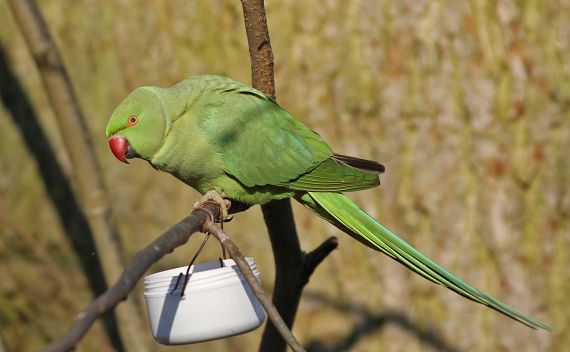

---

In [13]:
perruches = species_data.loc[:,"Perruche à collier"]

In [14]:
perruches.describe()

count    12.00000
mean      8.25000
std       5.52885
min       2.00000
25%       3.75000
50%       8.00000
75%      12.25000
max      18.00000
Name: Perruche à collier, dtype: float64

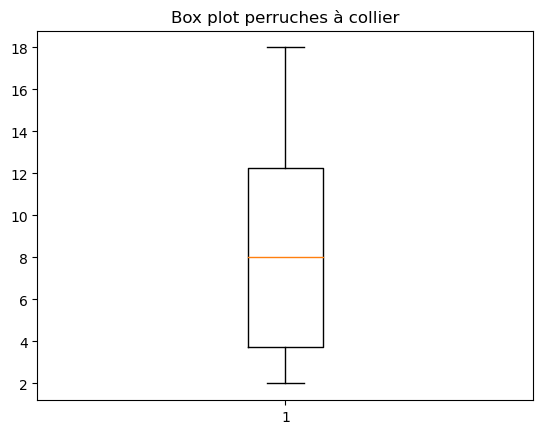

In [15]:
plt.boxplot(perruches)
plt.title("Box plot perruches à collier")
plt.show()

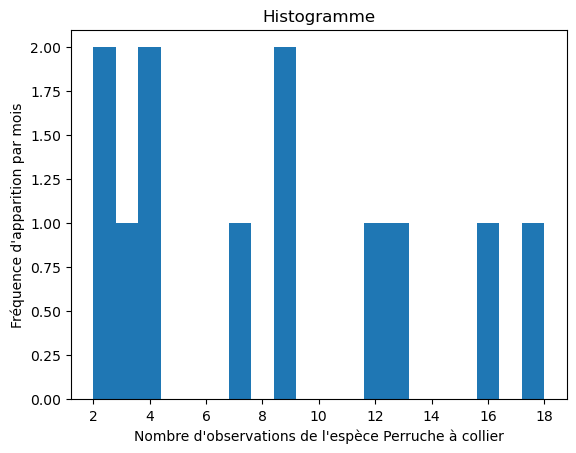

In [16]:
perruches.hist(bins=(20))
plt.grid(False)
plt.title("Histogramme")
plt.xlabel("Nombre d'observations de l'espèce Perruche à collier")
plt.ylabel("Fréquence d'apparition par mois")
plt.show()

#### L'histogramme donne la fréquence d'observations des perruches à collier observées durant l'année, ce qui permet de donner une idée de la répartition des observations.



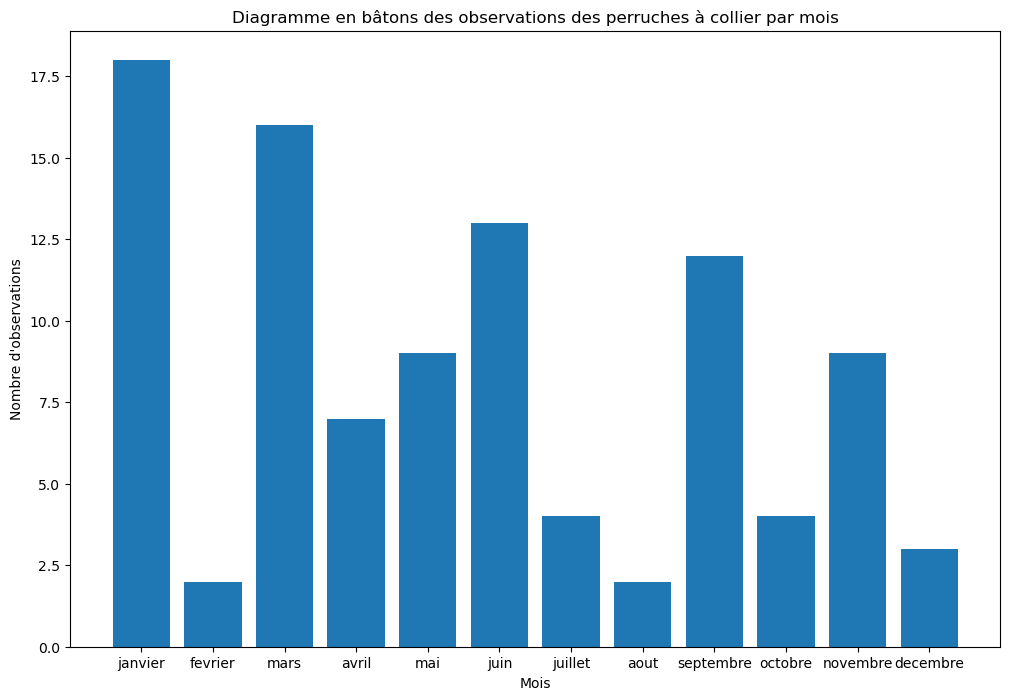

In [17]:
mois = data.iloc[:,0]
plt.figure(figsize=(12,8))
plt.bar(mois, perruches)
plt.title("Diagramme en bâtons des observations des perruches à collier par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'observations")
plt.show()

In [18]:
species_without_perruches = species_data.drop("Perruche à collier", axis = 1)
species_without_perruches # shape 12x11

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
0,22,4,3,22,16,22,15,1,37,14,5
1,9,3,4,13,7,9,8,1,8,6,4
2,25,2,7,24,16,12,15,17,24,9,10
3,7,2,2,12,7,4,1,3,10,1,5
4,7,1,5,24,4,2,5,8,9,11,7
5,15,1,5,23,8,10,8,3,25,11,12
6,10,2,5,11,6,3,5,4,13,4,2
7,21,1,2,17,10,5,4,7,14,10,5
8,15,1,5,10,11,8,6,2,32,12,5
9,6,1,1,4,4,3,2,1,34,6,1


In [19]:
moyenne_par_mois = []
for i in range(len(species_without_perruches.index)):
    moyenne_par_mois.append(species_without_perruches.iloc[i,:].mean())
moyenne_par_mois

[14.636363636363637,
 6.545454545454546,
 14.636363636363637,
 4.909090909090909,
 7.545454545454546,
 11.0,
 5.909090909090909,
 8.727272727272727,
 9.727272727272727,
 5.7272727272727275,
 10.181818181818182,
 3.1818181818181817]

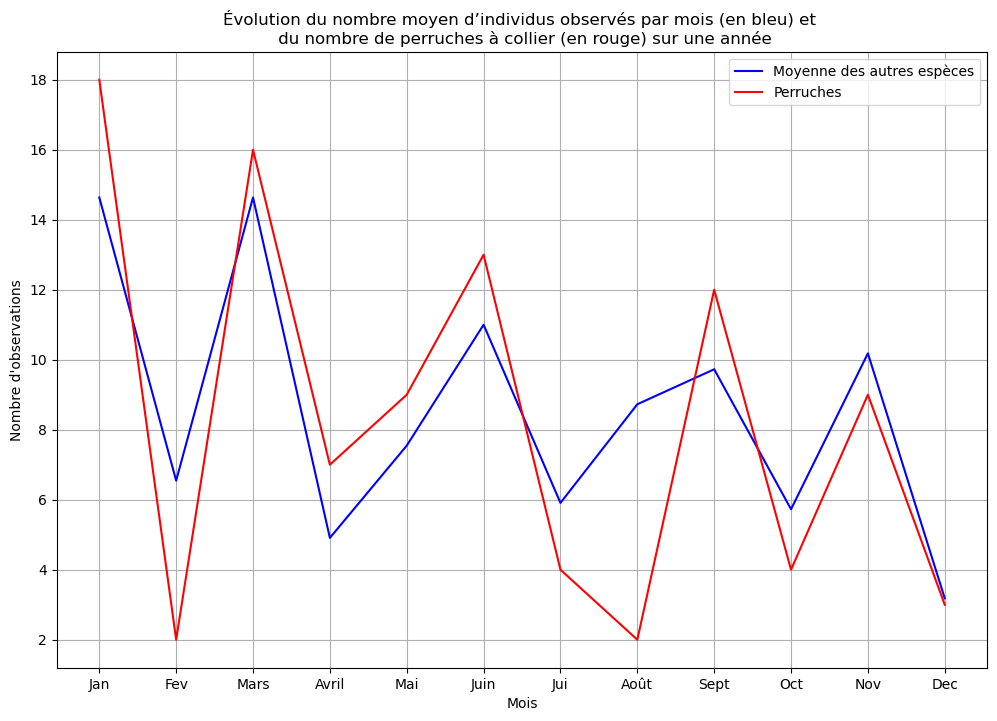

In [20]:
mois = np.arange(1,13,1)

plt.figure(figsize=(12,8))
plt.plot(mois,moyenne_par_mois,c="b",label="Moyenne des autres espèces")
plt.plot(mois, perruches, c='r',label="Perruches")

x_labels = ["Jan", "Fev", "Mars", "Avril", "Mai", "Juin", "Jui", "Août", "Sept", "Oct", "Nov", "Dec"] 
plt.xticks(ticks=mois, labels=x_labels) #renommage de l'axe des abscisses


plt.title("Évolution du nombre moyen d’individus observés par mois (en bleu) et \n du nombre de perruches à collier (en rouge) sur une année")
plt.xlabel("Mois")
plt.ylabel("Nombre d'observations")
plt.legend()

plt.grid()

plt.show()

On constate que les deux figures suivent une tendance similaire, c'est-à-dire que le nombre de perruches à collier observées chaque mois suis le même 'pattern' que le nombre moyen d'observation pour les autres espèces.

#### Coefficient de corrélation (Pearson's correlation formula) 

In [21]:
species_data.corr() # Matrice de correlation du dataset

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
Corneille noire,1.000000,0.386060,0.447144,0.626195,0.835549,0.684657,0.620783,0.676334,0.507687,0.474268,0.679872,0.502778
Geai des chênes,0.386060,1.000000,0.103324,0.197557,0.176813,0.440426,0.239133,0.198349,0.188908,0.120679,0.461783,-0.106632
Grimpereau des jardins,0.447144,0.103324,1.000000,0.648364,0.388216,0.261244,0.543741,0.567395,0.500359,0.103648,0.400694,0.662989
Merle noir,0.626195,0.197557,0.648364,1.000000,0.509975,0.510609,0.657924,0.638747,0.453238,0.134689,0.599124,0.832690
Mésange bleue,0.835549,0.176813,0.388216,0.509975,1.000000,0.832572,0.722741,0.846985,0.261379,0.521437,0.393277,0.452236
Mésange charbonnière,0.684657,0.440426,0.261244,0.510609,0.832572,1.000000,0.753500,0.857277,-0.036658,0.600092,0.520062,0.378256
Perruche à collier,0.620783,0.239133,0.543741,0.657924,0.722741,0.753500,1.000000,0.738454,0.258755,0.641700,0.590548,0.643477
Pie bavarde,0.676334,0.198349,0.567395,0.638747,0.846985,0.857277,0.738454,1.000000,0.249027,0.438551,0.406988,0.527334
Pigeon biset,0.507687,0.188908,0.500359,0.453238,0.261379,-0.036658,0.258755,0.249027,1.000000,-0.154695,0.252447,0.389054
Pigeon ramier,0.474268,0.120679,0.103648,0.134689,0.521437,0.600092,0.641700,0.438551,-0.154695,1.000000,0.539998,0.167463


In [22]:
print("Coefficient de corrélation entre la variable Perruche à collier et chacune des autres variables : \n")
species_data.corr()["Perruche à collier"] # Corrélation spécifique à la variable 'Perruche à collier'

Coefficient de corrélation entre la variable Perruche à collier et chacune des autres variables : 



Corneille noire           0.620783
Geai des chênes           0.239133
Grimpereau des jardins    0.543741
Merle noir                0.657924
Mésange bleue             0.722741
Mésange charbonnière      0.753500
Perruche à collier        1.000000
Pie bavarde               0.738454
Pigeon biset              0.258755
Pigeon ramier             0.641700
Rougegorge familier       0.590548
Troglodyte mignon         0.643477
Name: Perruche à collier, dtype: float64

In [23]:
correlation_perruches = species_data.corr()["Perruche à collier"].drop("Perruche à collier") # Suppression de la variable Perruche à collier (r=1)

In [24]:
print("La plus forte valeur de corrélation est de : ", max(correlation_perruches), "obtenue avec l'espèce :", correlation_perruches.idxmax())

La plus forte valeur de corrélation est de :  0.7535001525090189 obtenue avec l'espèce : Mésange charbonnière


In [25]:
print("La plus faible valeur de corrélation est de : ", min(correlation_perruches), "obtenue avec l'espèce :", correlation_perruches.idxmin())

La plus faible valeur de corrélation est de :  0.23913305731950327 obtenue avec l'espèce : Geai des chênes


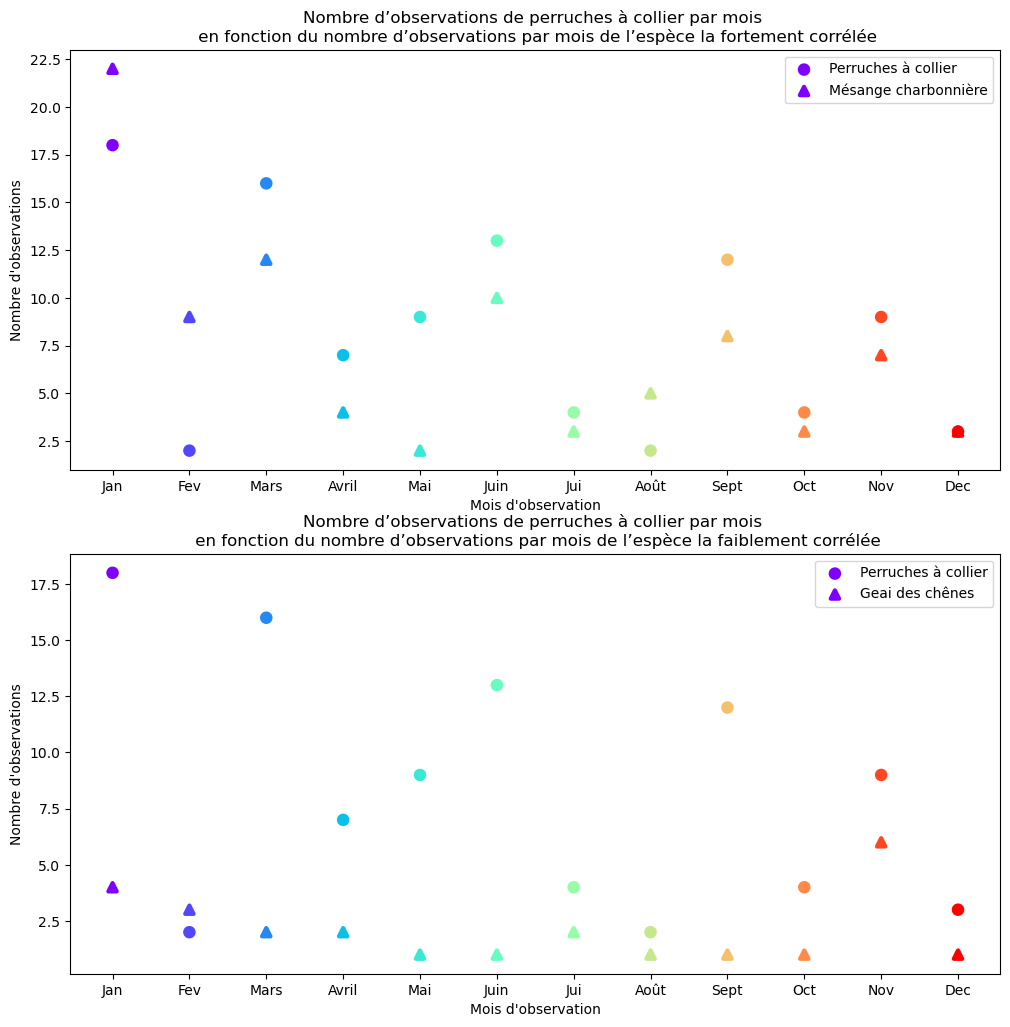

In [26]:
espece_fortement_correlee = correlation_perruches.idxmax()
espece_faiblement_correlee = correlation_perruches.idxmin()

mesangeCharbonniere = species_data.loc[:,espece_fortement_correlee]
geai = species_data.loc[:,espece_faiblement_correlee]


plt.figure(figsize=(12,12))

couleurs = itertools.cycle(['red', 'blue', 'green', 'orange', 'purple', 'yellow'])

plt.subplot(2,1,1)
plt.scatter(mois,perruches,label="Perruches à collier", c = mois, cmap="rainbow",lw=3)
plt.scatter(mois,mesangeCharbonniere,label="Mésange charbonnière",c=mois, cmap="rainbow", marker="^",lw=3)

x_labels = ["Jan", "Fev", "Mars", "Avril", "Mai", "Juin", "Jui", "Août", "Sept", "Oct", "Nov", "Dec"] 
plt.xticks(ticks=mois, labels=x_labels) #renommage de l'axe des abscisses

plt.title("Nombre d’observations de perruches à collier par mois \n en fonction du nombre d’observations par mois de l’espèce la fortement corrélée")
plt.xlabel("Mois d'observation")
plt.ylabel("Nombre d'observations")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(mois,perruches,label="Perruches à collier", c = mois, cmap="rainbow",lw=3)
plt.scatter(mois,geai,label="Geai des chênes", c = mois, cmap="rainbow",lw=3, marker="^")

x_labels = ["Jan", "Fev", "Mars", "Avril", "Mai", "Juin", "Jui", "Août", "Sept", "Oct", "Nov", "Dec"] 
plt.xticks(ticks=mois, labels=x_labels) #renommage de l'axe des abscisses

plt.title("Nombre d’observations de perruches à collier par mois \n en fonction du nombre d’observations par mois de l’espèce la faiblement corrélée")
plt.xlabel("Mois d'observation")
plt.ylabel("Nombre d'observations")
plt.legend()

plt.show()

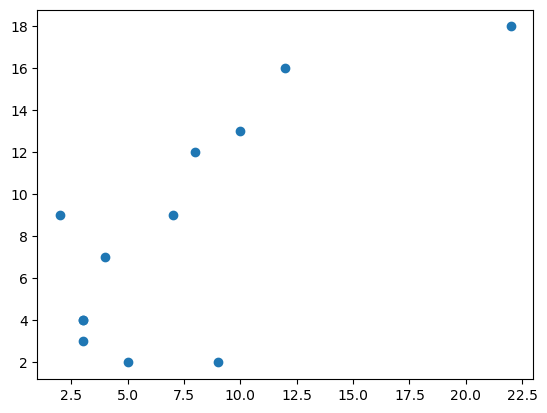

In [27]:
# Graphiques pour regression lineaire
plt.scatter(mesangeCharbonniere, perruches)
#plt.scatter(geai, perruches)

# Partie 2 - Analyse en Composante Principales (ACP)

---

# Partie 3 - Régression linéaire simple
---

### Nous tentons maintenant d’ajuster un modèle de régression linéaire pour prédire le nombre de perruches à collier en fonction du nombre d’oiseaux d’une autre espèce

##### 1 - Regression linéaire entre la variable Perruches à collier et mesangeCharbonniere (max de correlation)

In [28]:
X = mesangeCharbonniere
y = perruches

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)


model.fit(X,y) # entrainement du modèle

r2 = model.score(X,y) # r2 = r**2 = 0.75**2
model.score(X,y) 

0.5677624798311145

In [31]:
# Nombre d'échantillons
n = len(y)

# Nombre de caractéristiques
p = 1

# Coefficient de détermination R2 ajusté
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)
r2_adjusted

0.524538727814226

In [48]:
beta_0 = model.intercept_
beta_0

array([2.82361377])

In [49]:
beta_1 = model.coef_[0]
beta_1

array([0.73996176])

In [50]:
prediction = model.predict(X)

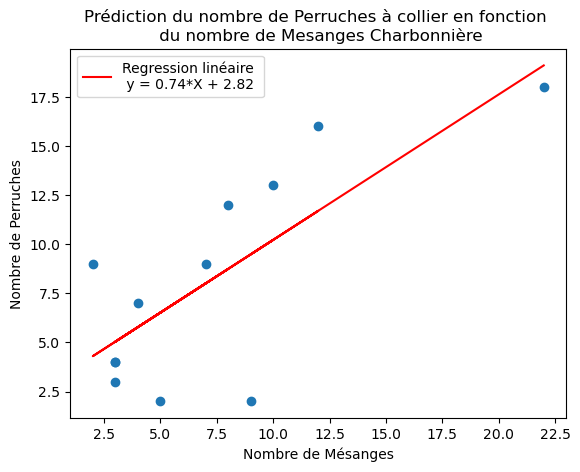

In [51]:
plt.scatter(X,y)
plt.plot(X,prediction,c="r",label=f"Regression linéaire \n y = {round(float(beta_1),2)}*X + {round(float(beta_0),2)} ")
plt.title("Prédiction du nombre de Perruches à collier en fonction \n du nombre de Mesanges Charbonnière")
plt.xlabel("Nombre de Mésanges")
plt.ylabel("Nombre de Perruches")
plt.legend()
plt.show()

Équation de regréssion linéaire : y = 0.74*X + 2.82 (3 chiffres significatifs)

In [36]:
float(model.predict([[20]])) # si on a observé 20 mésanges un mois donné, alors on peut prédire qu'on a observé 18 perruches ce mois-ci

17.622848948374763

##### 2 - Regression linéaire entre la variable Perruches à collier et Geai des chênes (min de correlation)


In [37]:
X1 = geai
y1 = perruches

In [38]:
model1 = LinearRegression()

X1 = np.array(X1).reshape(-1,1)
y1 = np.array(y1).reshape(-1,1)

model1.fit(X1,y1)

r2_model1 = model1.score(X1,y1)
model1.score(X1,y1)

0.0571846191029729

In [39]:
# Nombre d'échantillons
n = len(y1)

# Nombre de caractéristiques
p = 1

# Coefficient de détermination R2 ajusté
r2_adjusted = 1 - (1 - r2_model1) * (n - 1) / (n - p - 1)
r2_adjusted

-0.03709691898672984

In [52]:
beta_0 = model1.intercept_
beta_0

array([6.48916409])

In [53]:
beta_1 = model1.coef_
beta_1

array([[0.84520124]])

Equation de regréssion linéaire : y = 0.85*X + 6.49

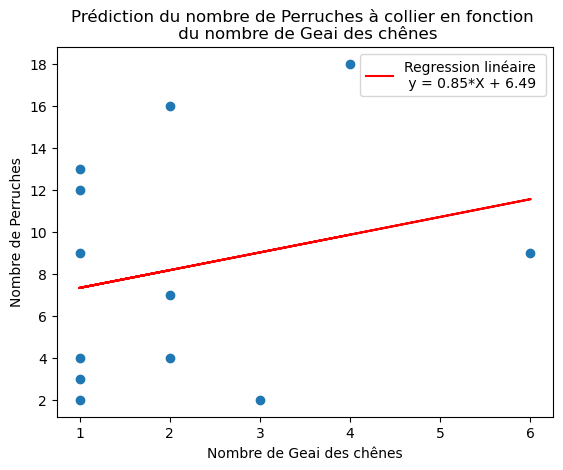

In [54]:
prediction1 = model1.predict(X1)

plt.scatter(X1,y1)
plt.plot(X1,prediction1,color="r",label=f"Regression linéaire \n y = {round(float(beta_1),2)}*X + {round(float(beta_0),2)}")
plt.title("Prédiction du nombre de Perruches à collier en fonction \n du nombre de Geai des chênes")
plt.xlabel("Nombre de Geai des chênes")
plt.ylabel("Nombre de Perruches")
plt.legend()